In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [14]:
#from sklearn.datasets import load_diabetes

In [15]:
#diabetes_data=load_diabetes()

df=pd.read_csv("E:/Data Science/data/Boston.csv")

In [16]:
df.head()
df.dropna(axis=0,inplace=True)

In [17]:
# Scaling - using Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=df.columns
df=pd.DataFrame(scaler.fit_transform(df),columns=cols)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.400818,0.273342,-1.259620,-0.271237,-0.134687,0.423161,-0.134014,0.135851,-0.974609,-0.656944,-1.496303,0.430740,-1.067126,0.179640
1,-0.398535,-0.479051,-0.569724,-0.271237,-0.745475,0.202245,0.357849,0.554334,-0.858633,-0.978184,-0.340879,0.430740,-0.497196,-0.083191
2,-0.398537,-0.479051,-0.569724,-0.271237,-0.745475,1.298216,-0.281214,0.554334,-0.858633,-0.978184,-0.340879,0.385097,-1.197278,1.351424
3,-0.397984,-0.479051,-1.278462,-0.271237,-0.842847,1.029962,-0.830521,1.076829,-0.742657,-1.097162,0.075073,0.405283,-1.346610,1.209058
4,-0.398258,-0.479051,-1.278462,-0.271237,-0.842847,0.215156,-0.367380,1.076829,-0.742657,-1.097162,0.075073,0.399564,-1.035615,0.694349


In [18]:
X=df.drop(columns=['MEDV'],axis=1)
Y=df['MEDV']

In [19]:
'''X=X.dropna()
Y=Y.dropna()
print(X.shape,Y.shape)'''

'X=X.dropna()\nY=Y.dropna()\nprint(X.shape,Y.shape)'

NOTE : General practice is to scale both independent and dependent values

In [20]:
# train test split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=25)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [31]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [32]:
cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=5)              # default=accuracy (categorisation)

array([-0.23661306, -0.38530296, -0.17458455, -0.30410301, -0.21241601])

In [33]:
mse=cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=10)
np.mean(mse)

-0.26083899871986016

In [30]:
'''from sklearn import metrics
metrics.get_scorer_names()'''

'from sklearn import metrics\nmetrics.get_scorer_names()'

In [34]:
y_predicted=model.predict(x_test)

<Axes: xlabel='MEDV', ylabel='Count'>

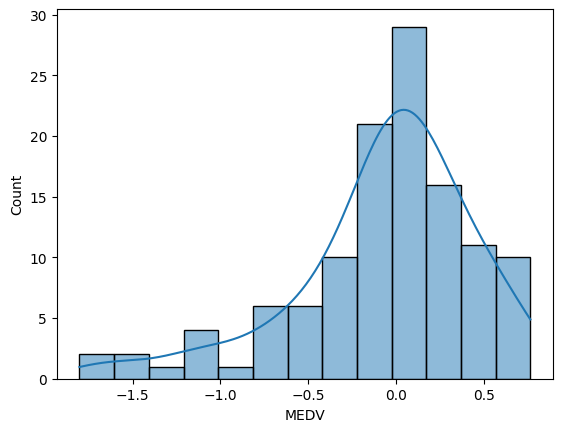

In [46]:
import seaborn as sns
sns.histplot(y_predicted-y_test,kde=True)      # kde = kernel density estimator

'''
import seaborn as sns
sns.displot(y_predicted-y_test,kind='kde') '''

In [45]:
from sklearn.metrics import r2_score
score=r2_score(y_predicted,y_test)
print(score)

0.6861981649579381


Note: (No feature engineering ,imputation,transformation etc done b/c this is just linear regression demo)

### Ridge Regression Algorithm

Ridge and Lasso used to avoid overfitting, Lasso can do Feature selection also
- (lambda is similar to alpha of gradient descent(learning rate ) it has same purpose ) default lambda/alpha =1,  if =0 => Simple Linear Regression

In [50]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

gridsearchcv will help us to find ideal lambda

In [51]:
ridge_regressor=Ridge()                           #object of Ridge class (model)

In [52]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [53]:
print(ridgecv.best_params_)

{'alpha': 5}


In [54]:
print(ridgecv.best_score_)   #due to scaling Y 0.26 else 26

-0.2608362272148804


In [55]:
ridge_pred=ridgecv.predict(x_test)

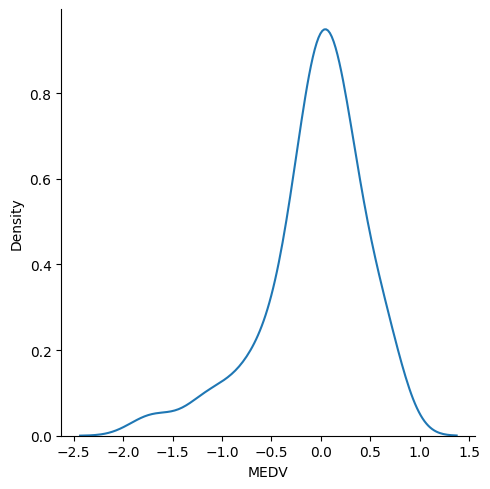

In [56]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [58]:
score=r2_score(ridge_pred,y_test)

In [59]:
score

0.6742371463294528

In [60]:
## Lasso Regression
from sklearn.linear_model import Lasso

In [61]:
lasso=Lasso()

In [62]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [63]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-0.9111659605659754


In [64]:
lasso_pred=lassocv.predict(x_test)

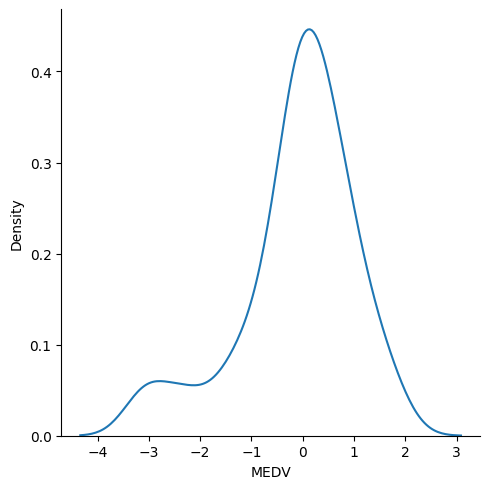

In [65]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')

In [ ]:
score=r2_score(lasso_pred,y_test)
print(score)

In [66]:
# Krish Naik

In [ ]:
#Elasticnet
from sklearn.linear_model import ElasticNet